In [40]:
import numpy as np
import matplotlib.pylab as plt
import scipy.optimize
import autograd

In [41]:
def rosenbrock(x):
    a, b = 1, 100
    return (a-x[0])**2 + b*(x[1]-x[0]**2)**2

def plot_rosenbrock():
    x = np.linspace(-5, 5, 100); y = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x, y)
    Z = rosenbrock([X, Y])
    plt.contourf(x, y, Z)
    plt.colorbar()

In [42]:
def plot_path(path):
    plt.plot(path[:, 0], path[:, 1], 'x-k')

In [43]:
def optimize(f, method, autodiff):
    points = []
    def callback(x):
        points.append((x[0], x[1]))
    
    x0 = np.array([2.5, 2.5])
    callback(x0)
    jacobian = autograd.grad(f) if autodiff else None

    if method == 'shgo':
        bounds = [(-10, 10), (-1, 10)]
        res = scipy.optimize.shgo(
            f, bounds, callback=callback, options={'disp': True})
    else:
        res = scipy.optimize.minimize(
            f, x0, method=method, callback=callback, jac=jacobian, options={'disp': True})
    
    return np.array(points)

Splitting first generation
Callback for minimizer starting at [0.  4.5]:
Starting minimization at [0.  4.5]...
bounds in kwarg:
[[-10.0, 10.0], [-1.0, 10.0]]
lres =      fun: 1.9560147309343922e-11
     jac: array([ 2.84598115e-06, -1.36561056e-06])
 message: 'Optimization terminated successfully'
    nfev: 77
     nit: 24
    njev: 24
  status: 0
 success: True
       x: array([0.99999558, 0.99999114])
Successfully completed construction of complex.


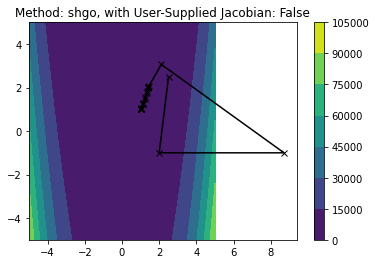

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 88
         Function evaluations: 168


/home/sabsr3/.local/lib/python3.8/site-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method nelder-mead does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,


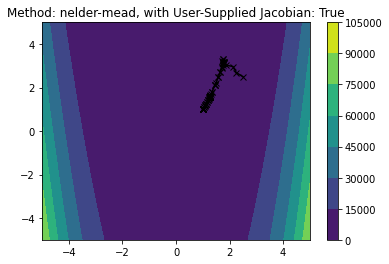

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 88
         Function evaluations: 168


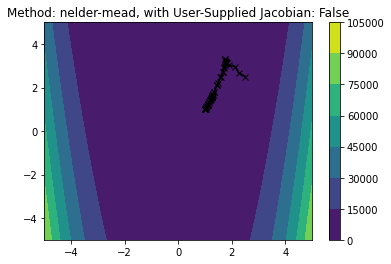

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 20
         Function evaluations: 47
         Gradient evaluations: 47


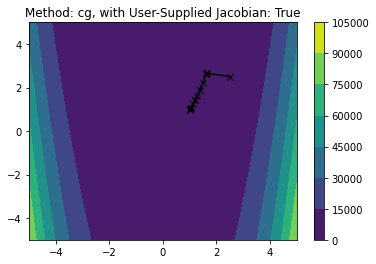

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 20
         Function evaluations: 144
         Gradient evaluations: 48


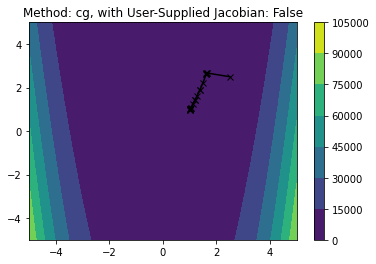

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 23
         Function evaluations: 27
         Gradient evaluations: 27


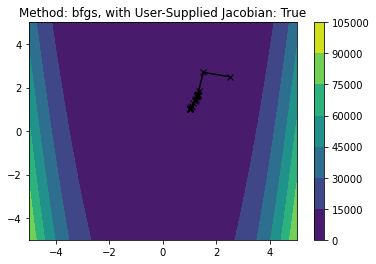

         Current function value: 0.000000
         Iterations: 23
         Function evaluations: 183
         Gradient evaluations: 57


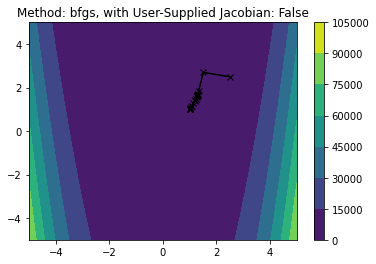

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 25
         Function evaluations: 39
         Gradient evaluations: 89
         Hessian evaluations: 0


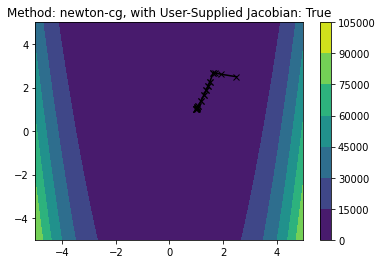

In [44]:
for method in ['shgo', 'nelder-mead', 'cg', 'bfgs', 'newton-cg']:
    for autodiff in [True, False]:
        if method == 'newton-cg' and autodiff == False:
            continue
        if method == 'shgo' and autodiff == True:
            continue
        path = optimize(rosenbrock, method, autodiff)
        plot_rosenbrock()
        plot_path(path)
        plt.title(f'Method: {method}, with User-Supplied Jacobian: {autodiff}')
        plt.show()